# Exploratory Data Analysis

Performing EDA on the given training data set to better understand the distribution and highlight underlying patterns in data

In [12]:
# Importing Required Libraries

%load_ext autoreload
%autoreload 2

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Read the training dataset
df_orig = pd.read_csv('train.csv')

In [4]:
# Make a copy of the original training dataset
df = df_orig.copy()
df.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,0,24,0,0,5,247.30,2,0,4,17,...,1,591.3,0,0.0,0,0,782.40,4,1458,0.8571
1,1,440875,1,1,0,37.65,1,1,0,45,...,0,0.0,0,0.0,0,0,119.60,3,1511,0.0400
2,2,878242,2,0,1,93.73,1,0,2,54,...,1,0.0,0,0.0,0,0,3248.00,5,1583,0.7407
3,3,1319841,3,0,0,95.88,0,0,0,86,...,0,0.0,0,0.0,0,0,21.49,1,1489,0.1146
4,4,1757883,4,0,1,0.00,0,0,1,58,...,0,0.0,0,0.0,0,0,640.80,4,1475,0.5217


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4357336 entries, 0 to 4357335
Data columns (total 26 columns):
Id                 int64
groupId            int64
matchId            int64
assists            int64
boosts             int64
damageDealt        float64
DBNOs              int64
headshotKills      int64
heals              int64
killPlace          int64
killPoints         int64
kills              int64
killStreaks        int64
longestKill        float64
maxPlace           int64
numGroups          int64
revives            int64
rideDistance       float64
roadKills          int64
swimDistance       float64
teamKills          int64
vehicleDestroys    int64
walkDistance       float64
weaponsAcquired    int64
winPoints          int64
winPlacePerc       float64
dtypes: float64(6), int64(20)
memory usage: 864.3 MB


In [5]:
# Creating a Display function to display upto a maximum of 1000 rows and 
# 1000 columns to be able to have a look at wider range of data
def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(df)

In [6]:
# This is where the display_all function comes in handy where we can
# see the information about all the columns below. Note that we have
# transposed the display so that we do not need to scroll left to right.
display_all(df.describe().T)

,count,mean,std,min,25%,50%,75%,max
Id,4357336.0,3.102678e+06,1.797477e+06,0.0,1.537746e+06,3.110606e+06,4.657295e+06,6224522.0
groupId,4357336.0,1.024777e+06,6.967197e+05,1.0,4.741378e+05,9.430320e+05,1.418544e+06,2700605.0
matchId,4357336.0,2.385539e+04,1.378227e+04,0.0,1.191400e+04,2.383700e+04,3.580100e+04,47733.0
assists,4357336.0,2.656320e-01,6.342160e-01,0.0,0.000000e+00,0.000000e+00,0.000000e+00,20.0
boosts,4357336.0,9.636856e-01,1.560643e+00,0.0,0.000000e+00,0.000000e+00,1.000000e+00,18.0
damageDealt,4357336.0,1.329033e+02,1.699439e+02,0.0,0.000000e+00,8.776000e+01,1.884000e+02,6384.0
DBNOs,4357336.0,6.901455e-01,1.191514e+00,0.0,0.000000e+00,0.000000e+00,1.000000e+00,63.0
headshotKills,4357336.0,2.385866e-01,6.103033e-01,0.0,0.000000e+00,0.000000e+00,0.000000e+00,26.0
heals,4357336.0,1.187169e+00,2.366389e+00,0.0,0.000000e+00,0.000000e+00,1.000000e+00,59.0
killPlace,4357336.0,4.703440e+01,2.732772e+01,1.0,2.300000e+01,4.700000e+01,7.000000e+01,100.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026AC02C8748>,
      dtype=object)

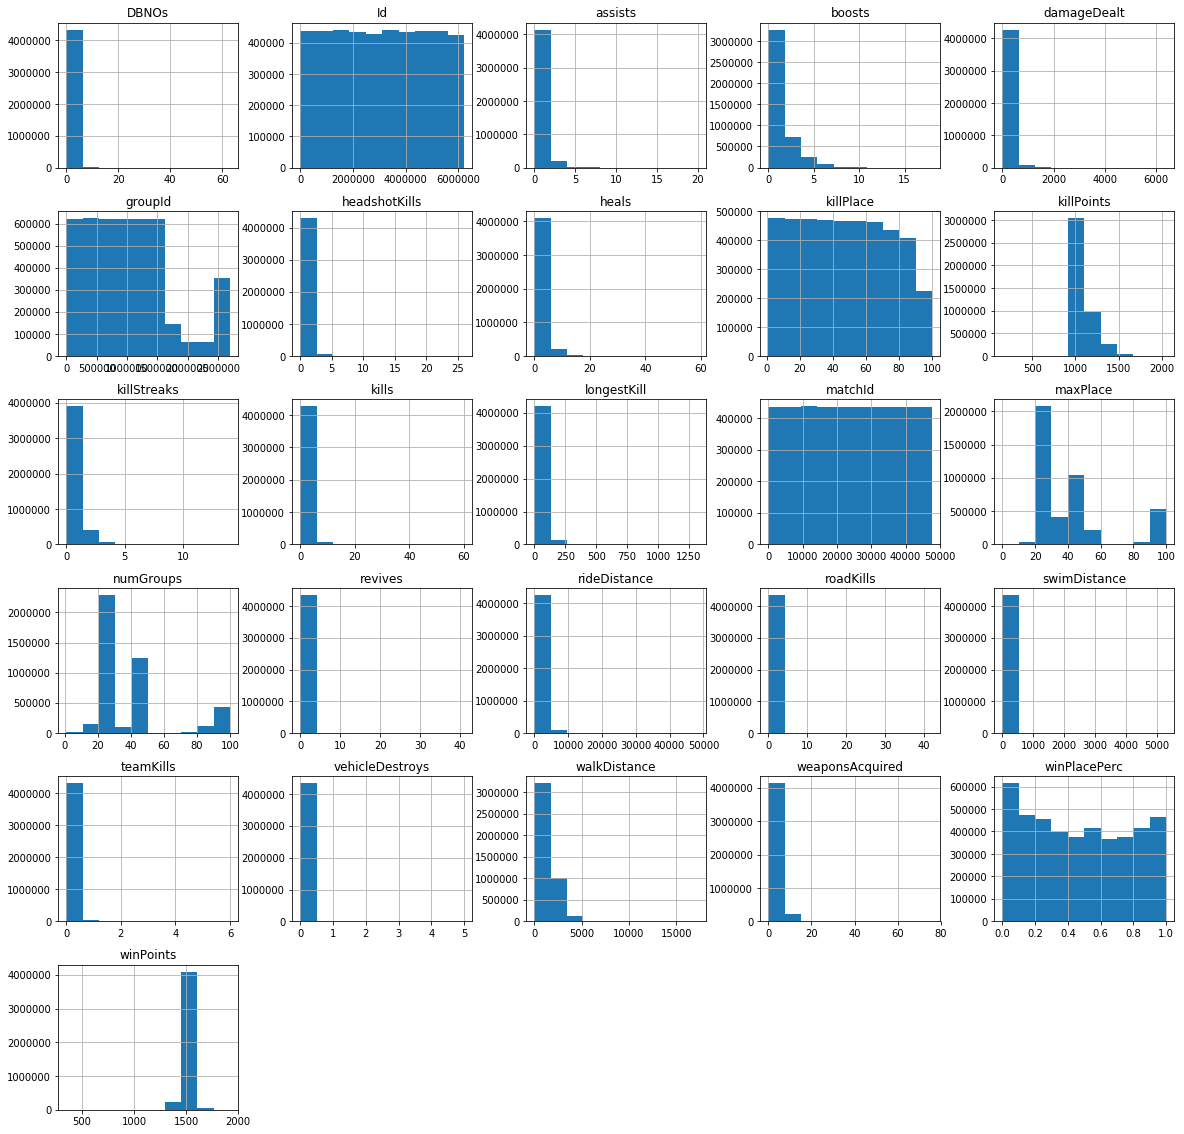

In [13]:
#Plotting a histogram of the entire dataset to get a feel of the distribution of data
df.hist(figsize=(20,20))

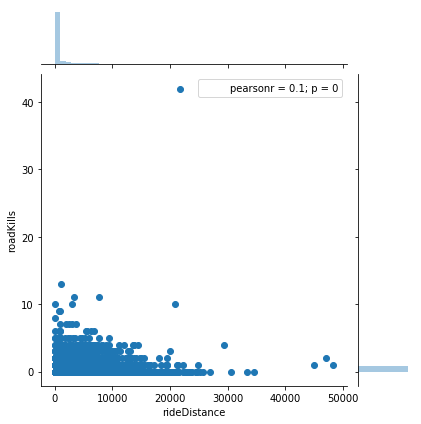

In [16]:
# It would make sense to look at a relationship between the distance travelled
# to the number of roadKills made. Plotting a seaborn joint plot.
sns.jointplot(y='roadKills', x='rideDistance',data=df, kind='scatter')

In [17]:
df['kills'].quantile(0.99)

7.0

In [18]:
# 99% of the users have made a kill of 7 or less. Thus, to decrease the scale
# we replace the value for kills more than .99 percentile with 8+
df = df_orig.copy()
df.loc[df['kills'] > df['kills'].quantile(0.99)] = '8+'

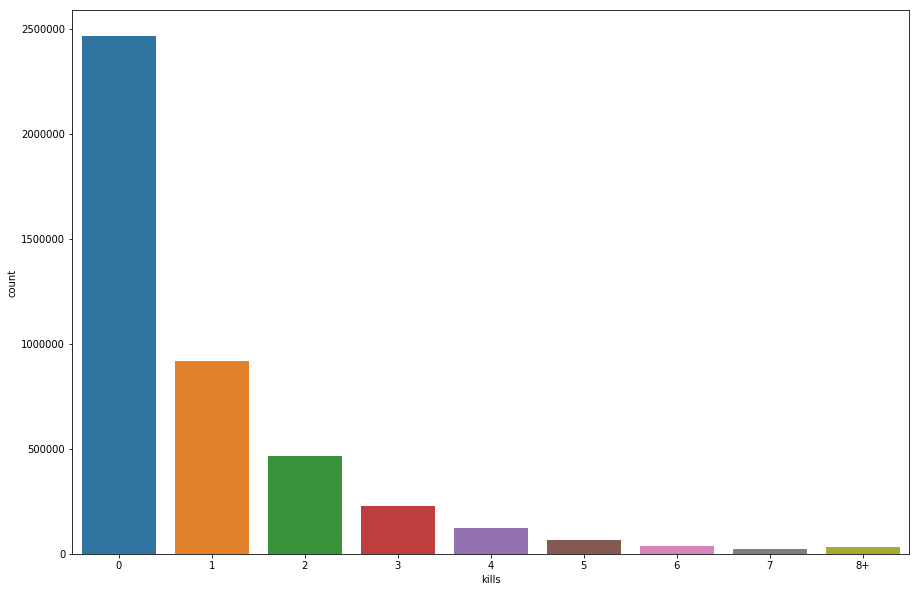

In [50]:
plt.figure(figsize=(15,10))
sns.countplot(df['kills'].astype('str').sort_values())

C:\Users\a.vivek\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\a.vivek\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


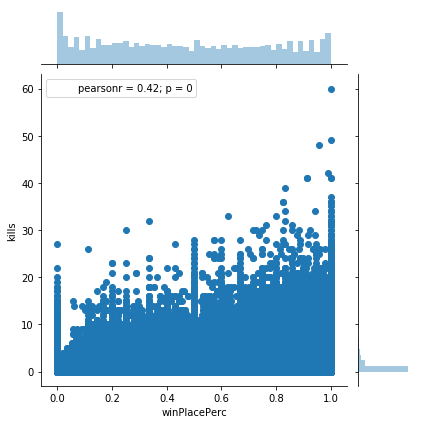

In [47]:
sns.jointplot(x="winPlacePerc", y="kills", data=df_orig)

C:\Users\a.vivek\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


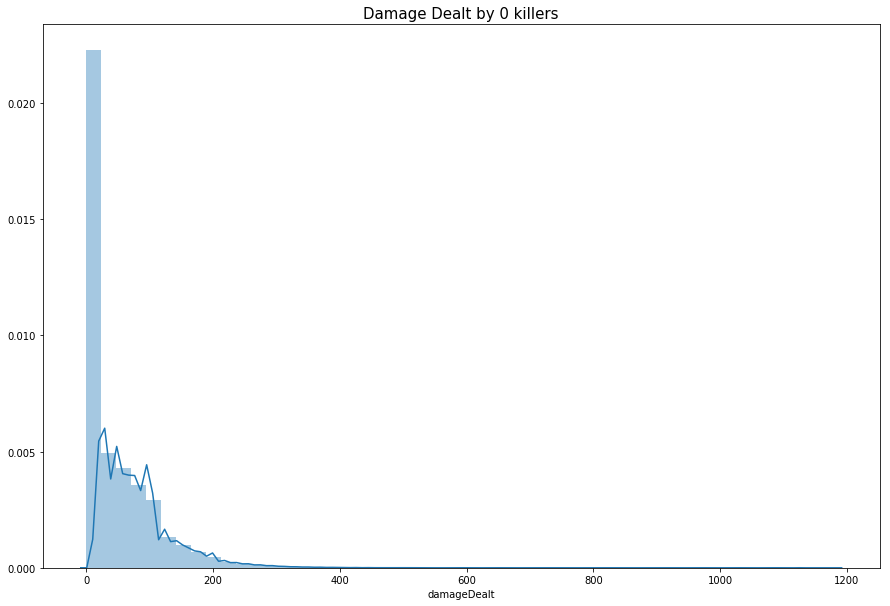

In [51]:
df = df_orig.copy()
df = df[df['kills'] == 0]
plt.figure(figsize=(15,10))
plt.title("Damage Dealt by 0 killers", fontsize  = 15)
sns.distplot(df['damageDealt'])

C:\Users\a.vivek\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


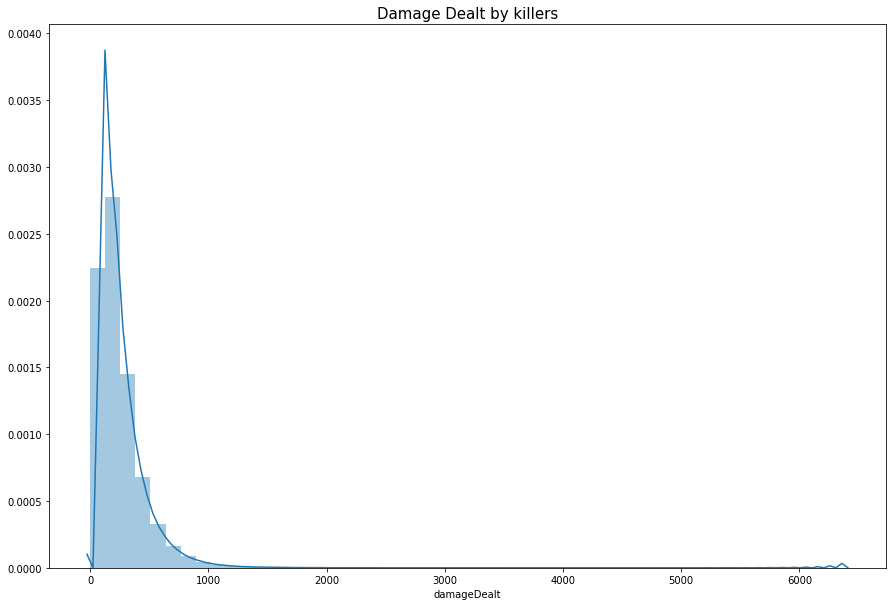

In [52]:
df = df_orig.copy()
df = df[df['kills'] > 0]
plt.figure(figsize=(15,10))
plt.title("Damage Dealt by killers", fontsize  = 15)
sns.distplot(df['damageDealt'])

C:\Users\a.vivek\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\a.vivek\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


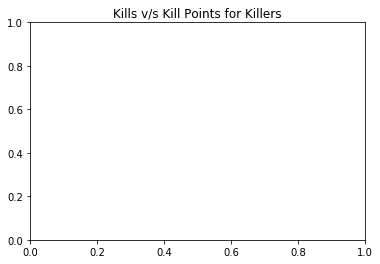

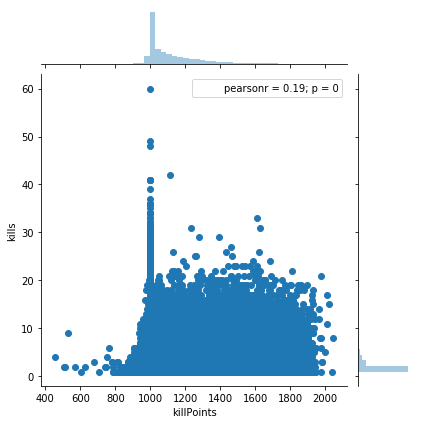

In [56]:
sns.jointplot(y="kills", x="killPoints", data=df)

C:\Users\a.vivek\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\a.vivek\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


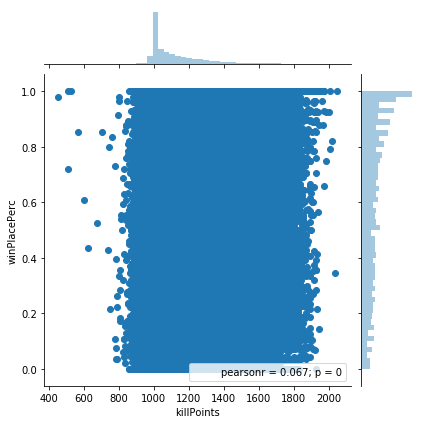

In [57]:
df = df_orig.copy()
sns.jointplot(y="winPlacePerc", x="killPoints", data=df)

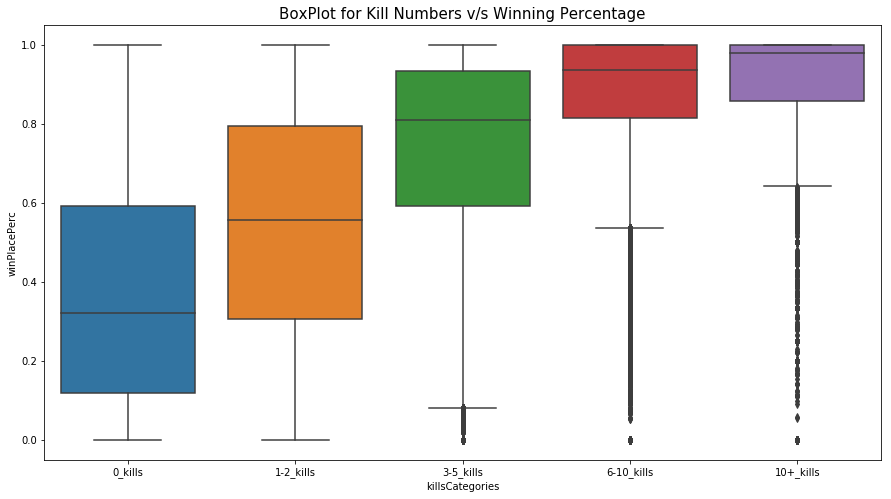

In [59]:
kills = df_orig.copy()

kills['killsCategories'] = pd.cut(kills['kills'], [-1, 0, 2, 5, 10, 60], labels=['0_kills','1-2_kills', '3-5_kills', '6-10_kills', '10+_kills'])

plt.figure(figsize=(15,8))
plt.title("BoxPlot for Kill Numbers v/s Winning Percentage", fontsize=15)
sns.boxplot(x="killsCategories", y="winPlacePerc", data=kills)
plt.show()

In [ ]:
plt.figure(figsize=(15,8))
plt.title("BoxPlot for Kill Numbers v/s Winning Percentage", fontsize=15)
sns.boxplot(x="killsCategories", y="winPlacePerc", data=kills)
plt.show()

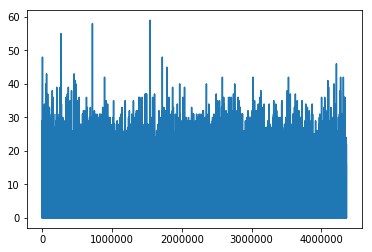

In [62]:
df_orig['heals'].plot()

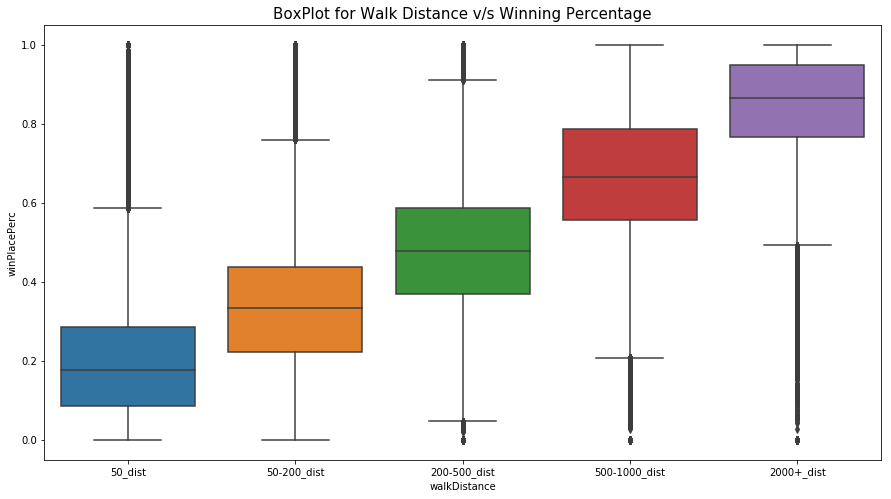

In [181]:
df = df_orig.copy()

df['walkDistance'] = pd.cut(df['walkDistance'], [50, 200, 500, 1000, 2000, 5000], labels=['50_dist','50-200_dist', '200-500_dist', '500-1000_dist', '2000+_dist'])

plt.figure(figsize=(15,8))
plt.title("BoxPlot for Walk Distance v/s Winning Percentage", fontsize=15)
sns.boxplot(x="walkDistance", y="winPlacePerc", data=df)
plt.show()

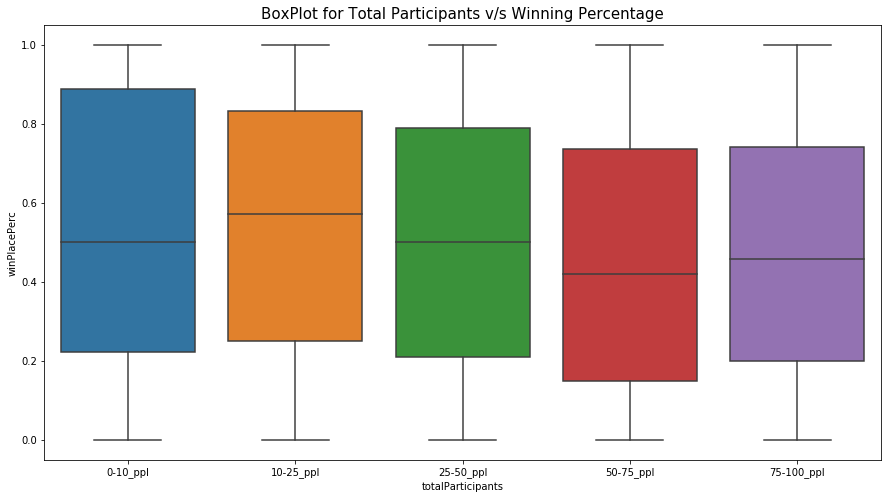

In [182]:
df = df_orig.copy()

df_matchIdCount = pd.DataFrame(df['matchId'].value_counts().reset_index())
df_matchIdCount.columns = ['matchId', 'totalParticipants']
df = pd.merge(df, df_matchIdCount, on='matchId')
df['totalParticipants'] = pd.cut(df['totalParticipants'], [0, 10, 25, 50, 75, 100], labels=['0-10_ppl','10-25_ppl', '25-50_ppl', '50-75_ppl', '75-100_ppl'])

plt.figure(figsize=(15,8))
plt.title("BoxPlot for Total Participants v/s Winning Percentage", fontsize=15)
sns.boxplot(x="totalParticipants", y="winPlacePerc", data=df)
plt.show()

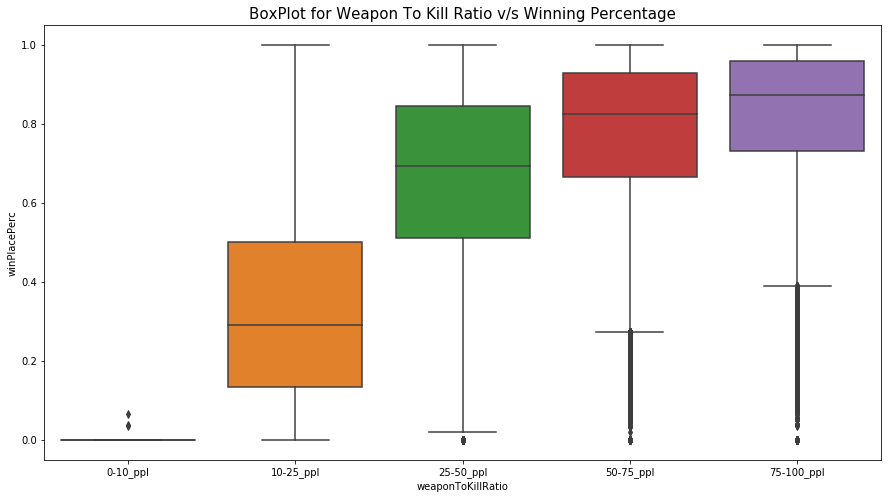

In [197]:
df = df_orig.copy()

df['weaponToKillRatio'] = df['weaponsAcquired'] / df['killPlace']
df['weaponToKillRatio'] = pd.cut(df['weaponToKillRatio'], [0, .01, .1, .4, .7, 1.0], labels=['0-10_ppl','10-25_ppl', '25-50_ppl', '50-75_ppl', '75-100_ppl'])

plt.figure(figsize=(15,8))
plt.title("BoxPlot for Weapon To Kill Ratio v/s Winning Percentage", fontsize=15)
sns.boxplot(x="weaponToKillRatio", y="winPlacePerc", data=df)
plt.show()

In [192]:
df = df_orig.copy()

df['weaponToKillRatio'] = df['weaponsAcquired'] / df['killPlace']
df['weaponToKillRatio'].describe()

count    4.357336e+06
mean     2.570053e-01
std      7.538107e-01
min      0.000000e+00
25%      2.898551e-02
50%      7.462687e-02
75%      1.785714e-01
max      5.200000e+01
Name: weaponToKillRatio, dtype: float64

In [196]:
df['weaponToKillRatio'].quantile(.90)

0.5

# Principal Component Analysis

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

In [30]:
X = df.drop('winPlacePerc',axis=1)
y = df['winPlacePerc']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 42) 

In [32]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [33]:
pca = PCA(.95)

In [34]:
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [35]:
pca.n_components_

19

In [36]:
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

# Applying PCA to Randam Forest

In [54]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

In [52]:
logisticRegr = LogisticRegression()

In [55]:
m = RandomForestRegressor(n_jobs=-1)
%time m.fit(X_train, y_train)

Wall time: 11min 42s


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [56]:
from sklearn.metrics import mean_absolute_error

In [57]:
pred = m.predict(X_test)
print (mean_absolute_error(y_test, pred))

0.35389581591443314


This shows that by applying PCA and using those components to build a model, we did not get a good MAE. Thus, we will proceed with some other methodology.

# Feature Engineering

In [80]:
df_feat = df_orig.copy()
df_feat['totalDistance'] = df_feat['rideDistance'] + df_feat['swimDistance'] + df_feat['walkDistance']
df_feat['walkDistancePercent'] = df_feat['walkDistance']/df_feat['totalDistance']

In [169]:
#df_feat['matchId'].value_counts()
df_feat[df_feat['matchId'] == 32826]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,totalDistance,walkDistancePercent,matchIdCount,killPercent
2996447,32826,1002572,32826,3,8,2131.0,0,17,22,2,...,0,0,0.00,34,1500,1.000,0.00,NaN,9,300.000000
2996448,101017,1002572,32826,2,8,3008.0,0,12,4,1,...,0,0,1090.00,41,1500,1.000,1090.00,1.000000,9,377.777778
2996449,169207,1002578,32826,1,9,345.8,0,1,2,9,...,0,0,225.80,41,1500,0.000,225.80,1.000000,9,33.333333
2996450,237397,1002575,32826,3,2,726.3,0,3,7,8,...,0,0,29.32,26,1500,0.625,29.32,1.000000,9,44.444444
2996451,305586,1002576,32826,3,6,1038.0,0,3,4,5,...,0,0,247.80,25,1500,0.500,247.80,1.000000,9,100.000000
2996452,373774,1002573,32826,3,0,1766.0,0,9,0,4,...,0,0,63.65,34,1500,0.875,63.65,1.000000,9,166.666667
2996453,441961,1002575,32826,5,2,1763.0,0,4,0,3,...,0,0,595.40,27,1500,0.625,595.40,1.000000,9,177.777778
2996454,510146,1002574,32826,4,0,1159.0,0,3,3,6,...,0,0,18.99,35,1500,0.750,18.99,1.000000,9,88.888889
2996455,578323,1002577,32826,2,0,753.8,0,2,0,7,...,0,0,1184.00,23,1500,0.250,2718.00,0.435614,9,55.555556


In [171]:
df_feat[df_feat['Id'] == 299122].T

,2408257
Id,299122.000000
groupId,718925.000000
matchId,26362.000000
assists,7.000000
boosts,0.000000
damageDealt,3479.000000
DBNOs,0.000000
headshotKills,4.000000
heals,1.000000
killPlace,3.000000


In [139]:
#df_feat[df_feat['matchId'] == 27978][df_feat['kills'] > 0]['killPlace'].sum()
df_matchId = pd.DataFrame(df_feat['matchId'].value_counts().reset_index())
df_matchId.columns = ['matchId', 'matchIdCount']
df_feat = pd.merge(df_feat, df_matchId, on='matchId')

In [153]:
#df_feat[df_feat['matchId'] == 27978]['groupId'].value_counts()
#df_feat[df_feat['matchId'] == 27978][df_feat['winPlacePerc'] > 0.9].T
#df_feat[df_feat['matchId'] == 27978][df_feat['groupId'] == 791054].T
df_feat_high = df_feat[df_feat['winPlacePerc'] > 0.85]
df_feat_low = df_feat[df_feat['winPlacePerc'] <= 0.86]

In [159]:
df_feat['killPercent'] = df_feat['kills']/df_feat['matchIdCount']* 100

In [160]:
df_feat['killPercent'].describe()

count    4.357336e+06
mean     1.081025e+00
std      2.885843e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.136364e+00
max      3.777778e+02
Name: killPercent, dtype: float64

In [198]:
df_feat['weaponToKillRatio'] = df_feat['weaponsAcquired'] / df_feat['killPlace']

In [ ]:
#sns.jointplot(y='kills', x='walkDistancePercent',data=df, kind='kde')
#sns.distplot(df['walkDistancePercent'])
sns.pairplot(df.dropna())

In [110]:
col = df.columns
(df[col] == 0).sum()

Id                           1
groupId                      0
matchId                     99
assists                3506546
boosts                 2591280
damageDealt            1102572
DBNOs                  2650506
headshotKills          3586587
heals                  2692009
killPlace                    0
killPoints                   0
kills                  2464072
killStreaks            2464072
longestKill            2493396
maxPlace                    96
numGroups                    0
revives                3777837
rideDistance           3439985
roadKills              4347655
swimDistance           4076544
teamKills              4304426
vehicleDestroys        4335704
walkDistance             94306
weaponsAcquired         227198
winPoints                    0
winPlacePerc            224016
totalDistance            92385
walkDistancePercent       1921
dtype: int64

In [111]:
(df[col].isna()).sum()

Id                         0
groupId                    0
matchId                    0
assists                    0
boosts                     0
damageDealt                0
DBNOs                      0
headshotKills              0
heals                      0
killPlace                  0
killPoints                 0
kills                      0
killStreaks                0
longestKill                0
maxPlace                   0
numGroups                  0
revives                    0
rideDistance               0
roadKills                  0
swimDistance               0
teamKills                  0
vehicleDestroys            0
walkDistance               0
weaponsAcquired            0
winPoints                  0
winPlacePerc               0
totalDistance              0
walkDistancePercent    92385
dtype: int64

In [113]:
df[col] = df[col].replace(0,np.NaN)
df.isnull().sum()

Id                           1
groupId                      0
matchId                     99
assists                3506546
boosts                 2591280
damageDealt            1102572
DBNOs                  2650506
headshotKills          3586587
heals                  2692009
killPlace                    0
killPoints                   0
kills                  2464072
killStreaks            2464072
longestKill            2493396
maxPlace                    96
numGroups                    0
revives                3777837
rideDistance           3439985
roadKills              4347655
swimDistance           4076544
teamKills              4304426
vehicleDestroys        4335704
walkDistance             94306
weaponsAcquired         227198
winPoints                    0
winPlacePerc            224016
totalDistance            92385
walkDistancePercent      94306
dtype: int64

In [106]:
df.loc[(df['walkDistancePercent'].isna())].T

,158,166,261,265,412,424,609,638,657,830,...,4357102,4357135,4357176,4357190,4357281,4357294,4357303,4357317,4357327,4357330
Id,158.0,166.0,261.0000,265.0000,4.120000e+02,424.0,609.0,638.0,6.570000e+02,830.0,...,6224289.0,6.224322e+06,6224363.0,6.224377e+06,6224468.0,6224481.0,6224490.0,6224504.0,6224514.0,6.224517e+06
groupId,260941.0,296654.0,712510.0000,729295.0000,1.378053e+06,1430005.0,2244730.0,2372499.0,2.456166e+06,2626527.0,...,1394443.0,1.426211e+06,1470381.0,1.486256e+06,1589832.0,1608255.0,1619392.0,1636043.0,1649084.0,1.652273e+06
matchId,158.0,166.0,261.0000,265.0000,4.120000e+02,424.0,609.0,638.0,6.570000e+02,830.0,...,41674.0,4.240800e+04,43424.0,4.378800e+04,46133.0,46543.0,46800.0,47197.0,47494.0,4.756600e+04
assists,0.0,0.0,0.0000,0.0000,1.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,...,0.0,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.000000e+00
boosts,0.0,0.0,0.0000,0.0000,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,...,0.0,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.000000e+00
damageDealt,0.0,0.0,0.0000,0.0000,5.040000e+01,0.0,0.0,0.0,0.000000e+00,0.0,...,0.0,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.000000e+00
DBNOs,0.0,0.0,0.0000,0.0000,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,...,0.0,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.000000e+00
headshotKills,0.0,0.0,0.0000,0.0000,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,...,0.0,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.000000e+00
heals,0.0,0.0,0.0000,0.0000,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,...,0.0,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.000000e+00
killPlace,84.0,97.0,87.0000,88.0000,9.400000e+01,55.0,87.0,93.0,8.900000e+01,85.0,...,97.0,9.300000e+01,96.0,9.600000e+01,99.0,100.0,96.0,100.0,97.0,9.800000e+01


In [61]:
df.loc[(df['killStreaks'] - df['kills']).max()]

Id                    0.0000
groupId              24.0000
matchId               0.0000
assists               0.0000
boosts                5.0000
damageDealt         247.3000
DBNOs                 2.0000
headshotKills         0.0000
heals                 4.0000
killPlace            17.0000
killPoints         1050.0000
kills                 2.0000
killStreaks           1.0000
longestKill          65.3200
maxPlace             29.0000
numGroups            28.0000
revives               1.0000
rideDistance        591.3000
roadKills             0.0000
swimDistance          0.0000
teamKills             0.0000
vehicleDestroys       0.0000
walkDistance        782.4000
weaponsAcquired       4.0000
winPoints          1458.0000
winPlacePerc          0.8571
totalDistance      1373.7000
Name: 0, dtype: float64

In [63]:
df.loc[df['killPlace'] < 10].head().T

,7,22,27,35,40
Id,7.00,22.0000,27.0000,3.500000e+01,4.000000e+01
groupId,2612473.00,572106.0000,792178.0000,1.142864e+06,1.364533e+06
matchId,7.00,22.0000,27.0000,3.500000e+01,4.000000e+01
assists,1.00,1.0000,0.0000,1.000000e+00,2.000000e+00
boosts,1.00,4.0000,2.0000,4.000000e+00,1.000000e+01
damageDealt,661.80,1633.0000,739.3000,3.168000e+02,2.110000e+02
DBNOs,2.00,12.0000,3.0000,0.000000e+00,0.000000e+00
headshotKills,3.00,6.0000,0.0000,1.000000e+00,0.000000e+00
heals,2.00,3.0000,3.0000,2.000000e+00,4.000000e+00
killPlace,3.00,1.0000,3.0000,9.000000e+00,5.000000e+00


In [73]:
df[['matchId','kills']].groupby(['matchId']).agg(['count'])

,kills
,count
matchId,
0,99
1,93
2,93
3,97
4,93
5,96
6,86
7,92


In [76]:
df.loc[df['matchId'] == 47733].describe().T

,count,mean,std,min,25%,50%,75%,max
Id,98.0,3.281812e+06,1.859265e+06,47733.000,1.693949e+06,3.319258e+06,4.917488e+06,6210759.00
groupId,98.0,1.659434e+06,8.102437e+00,1659420.000,1.659427e+06,1.659434e+06,1.659440e+06,1659447.00
matchId,98.0,4.773300e+04,0.000000e+00,47733.000,4.773300e+04,4.773300e+04,4.773300e+04,47733.00
assists,98.0,3.877551e-01,8.571429e-01,0.000,0.000000e+00,0.000000e+00,0.000000e+00,5.00
boosts,98.0,1.448980e+00,1.741681e+00,0.000,0.000000e+00,1.000000e+00,2.000000e+00,8.00
damageDealt,98.0,1.445387e+02,1.791977e+02,0.000,2.016000e+01,8.746500e+01,1.957500e+02,963.60
DBNOs,98.0,8.877551e-01,1.217422e+00,0.000,0.000000e+00,0.000000e+00,1.000000e+00,5.00
headshotKills,98.0,1.530612e-01,3.893436e-01,0.000,0.000000e+00,0.000000e+00,0.000000e+00,2.00
heals,98.0,2.642857e+00,3.758838e+00,0.000,0.000000e+00,1.000000e+00,4.000000e+00,16.00
killPlace,98.0,4.950000e+01,2.843413e+01,1.000,2.525000e+01,4.950000e+01,7.375000e+01,98.00
